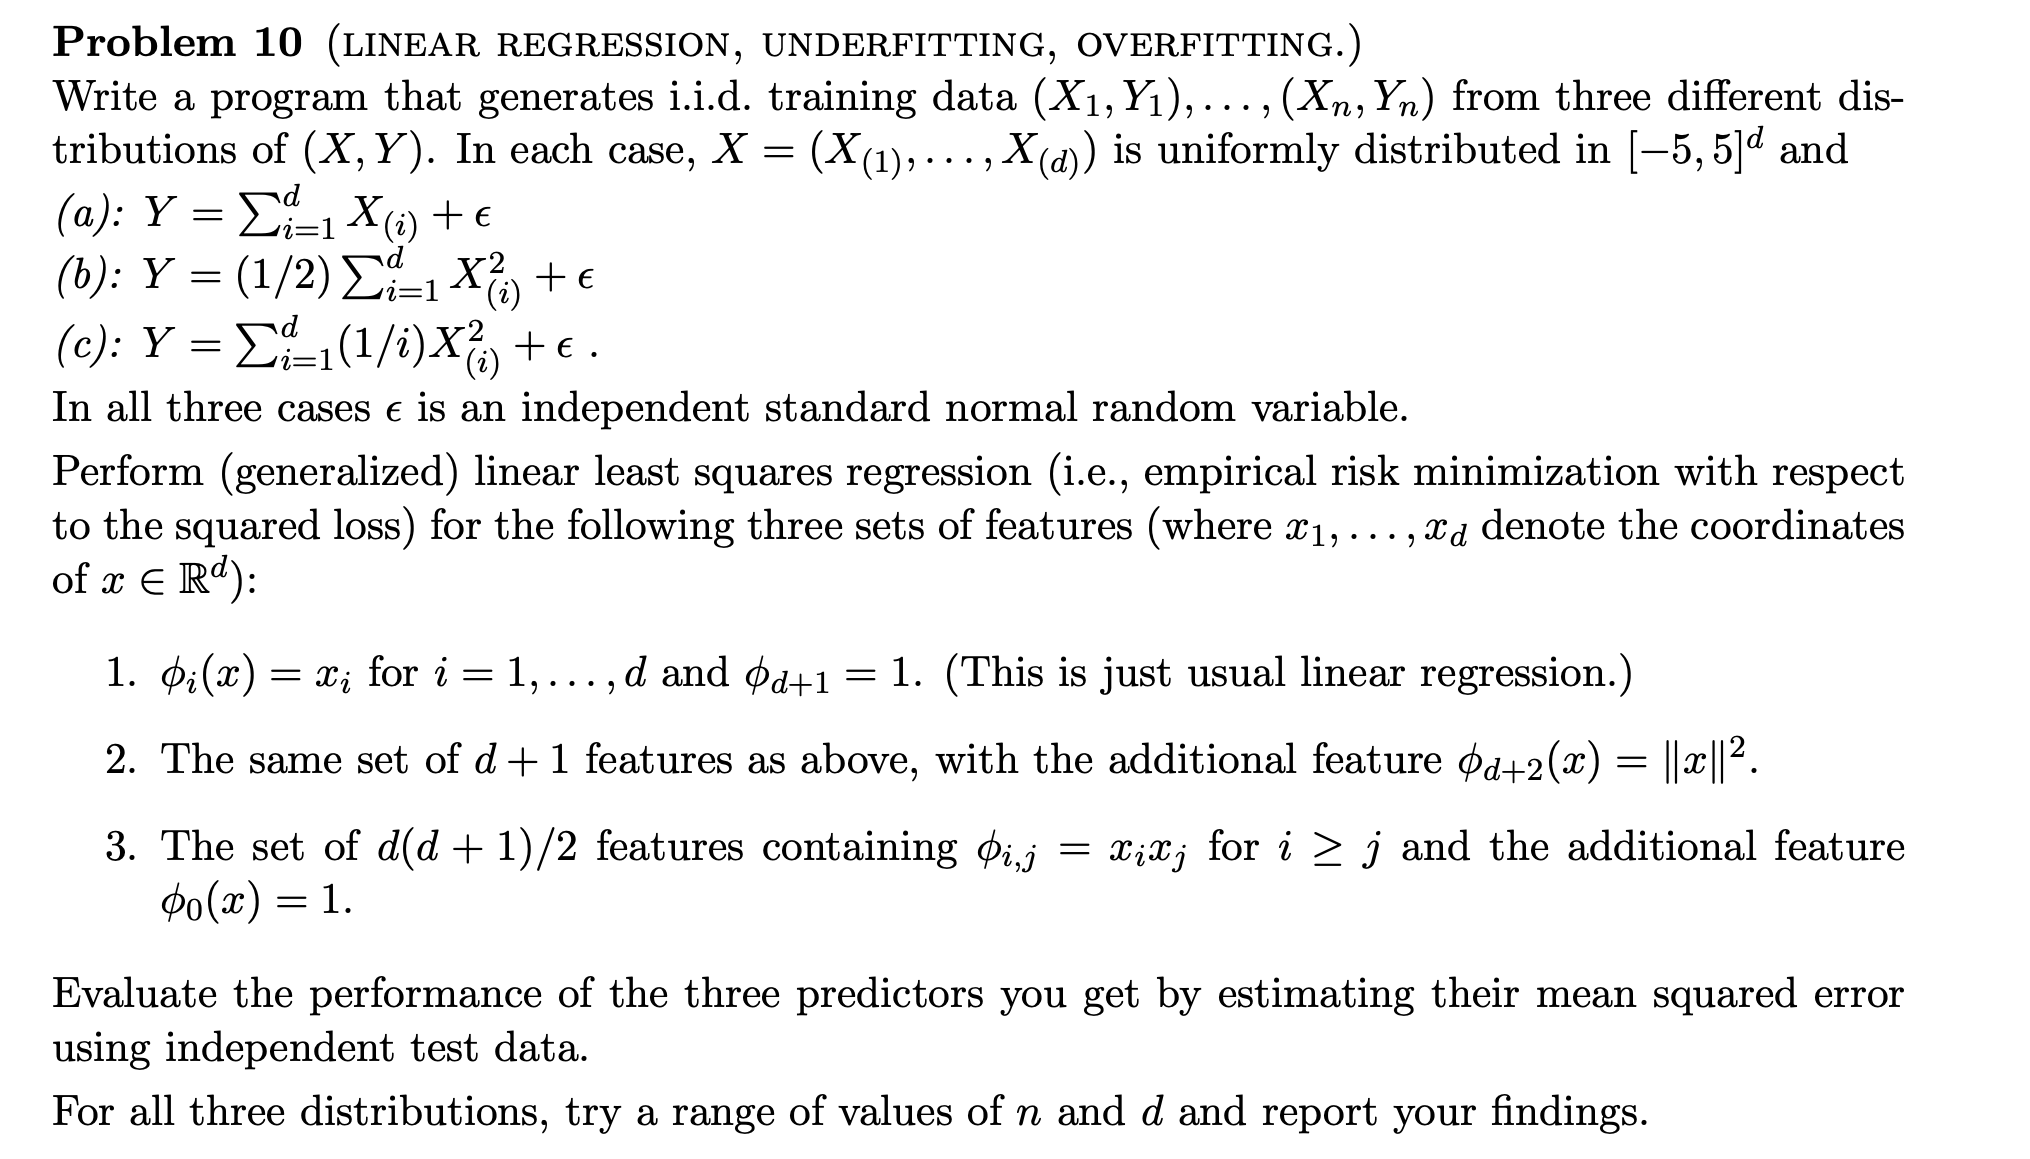

In [2]:
from IPython.display import Image
Image(filename='prob10.png')

# Results : Different Y generating processes and regression methods

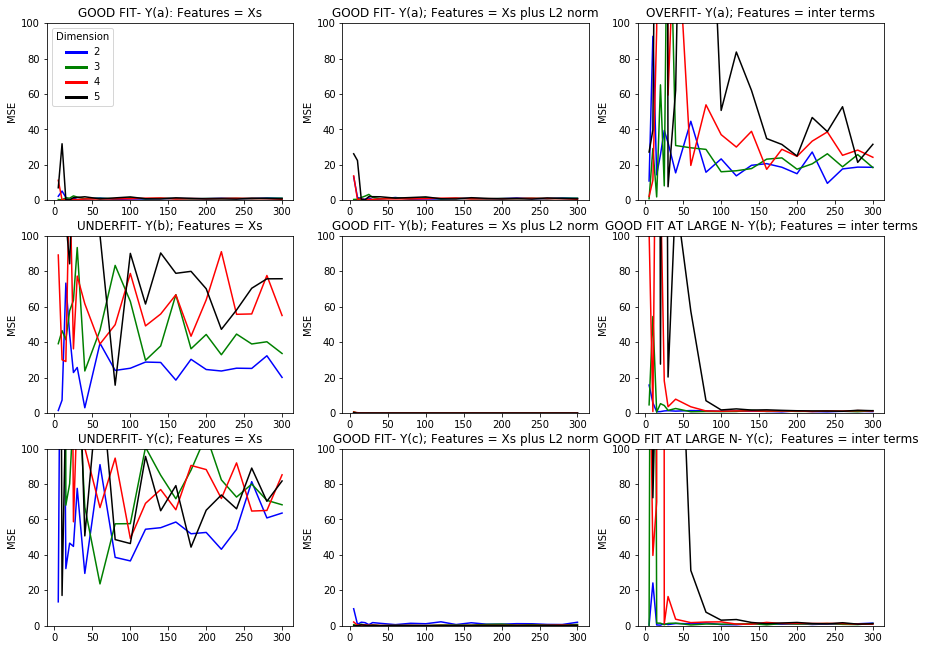

In [39]:
# Plot results
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

colors = ['blue', 'green', 'red', 'black']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['2', '3', '4', '5']

plt.show()


f, axs = plt.subplots(3,3,figsize=(15,15))

plt.subplot(4, 3, 1)
plt.plot(n_range, results_A1.iloc[:,0], 'b-', n_range, results_A1.iloc[:,1], 'g-', n_range, results_A1.iloc[:, 2], 'r-', n_range, results_A1.iloc[:,3], 'k-')
plt.title('GOOD FIT- Y(a): Features = Xs')
plt.ylabel('MSE')
plt.ylim(0,100)
plt.legend(lines, labels, loc = "upper left", title = "Dimension")

plt.subplot(4, 3, 2)
plt.plot(n_range, results_A2.iloc[:,0], 'b-', n_range, results_A2.iloc[:,1], 'g-', n_range, results_A2.iloc[:,2], 'r-', n_range, results_A2.iloc[:,3], 'k-')
plt.title('GOOD FIT- Y(a); Features = Xs plus L2 norm')
plt.ylabel('MSE')
plt.ylim(0,100)

plt.subplot(4, 3, 3)
plt.plot(n_range, results_A3.iloc[:,0], 'b-', n_range, results_A3.iloc[:,1], 'g-', n_range, results_A3.iloc[:,2], 'r-', n_range, results_A3.iloc[:,3], 'k-')
plt.title('OVERFIT- Y(a); Features = inter terms')
plt.ylabel('MSE')
plt.ylim(0,100)

plt.subplot(4, 3, 4)
plt.plot(n_range, results_B1.iloc[:,0], 'b-', n_range, results_B1.iloc[:,1], 'g-', n_range, results_B1.iloc[:,2], 'r-', n_range, results_B1.iloc[:,3], 'k-')
plt.title('UNDERFIT- Y(b); Features = Xs')
plt.ylabel('MSE')
plt.ylim(0,100)

plt.subplot(4, 3, 5)
plt.plot(n_range, results_B2.iloc[:,0], 'b-', n_range, results_B2.iloc[:,1], 'g-', n_range, results_B2.iloc[:,2], 'r-',n_range, results_B2.iloc[:,3], 'k-')
plt.title('GOOD FIT- Y(b); Features = Xs plus L2 norm')
plt.ylabel('MSE')
plt.ylim(0,100)

plt.subplot(4, 3, 6)
plt.plot(n_range, results_B3.iloc[:,0], 'b-', n_range, results_B3.iloc[:,1], 'g-', n_range, results_B3.iloc[:,2], 'r-', n_range, results_B3.iloc[:,3], 'k-')
plt.title('GOOD FIT AT LARGE N- Y(b); Features = inter terms')
plt.ylabel('MSE')
plt.ylim(0,100)

plt.subplot(4, 3, 7)
plt.plot(n_range, results_C1.iloc[:,0], 'b-', n_range, results_C1.iloc[:,1], 'g-', n_range, results_C1.iloc[:,2], 'r-', n_range, results_C1.iloc[:,3], 'k-')
plt.title('UNDERFIT- Y(c); Features = Xs')
plt.ylabel('MSE')
plt.ylim(0,100)

plt.subplot(4, 3, 8)
plt.plot(n_range, results_C2.iloc[:,0], 'b-', n_range, results_C2.iloc[:,1], 'g-', n_range, results_C2.iloc[:,2], 'r-', n_range, results_C2.iloc[:,3], 'k-')
plt.title('GOOD FIT- Y(c); Features = Xs plus L2 norm')
plt.ylabel('MSE')
plt.ylim(0,100)

plt.subplot(4, 3, 9)
plt.plot(n_range, results_C3.iloc[:,0], 'b-', n_range, results_C3.iloc[:,1], 'g-', n_range, results_C3.iloc[:,2], 'r-', n_range, results_C3.iloc[:,3], 'k-')
plt.title('GOOD FIT AT LARGE N- Y(c);  Features = inter terms')
plt.ylabel('MSE')
plt.ylim(0,100)


plt.show()

# Comments

How to read these subplots:

For each subplot:
- Out of sample MSE is plotted on the y axis.
- A range of ns is plotted on the x axis.
- Different dimensions are plotted in different colours on each plot
- Same scaling throughout 

Interpretation

- Row 1 : Y is a linear combination of Xs plus an error. 
    - Column 1: Features are Xs plus intercept
        - GOOD FIT
        - As Y is generated a linear combination of the Xs, and each of these Xs exist as a feature in the regression training input, it is possible to fit the training data well and also predict out of sample with a small amount of error (~1, the MSE generated from just the error term alone.)
    - Column 2: Features are Xs plus intercept plus L1 norm
        - GOOD FIT
        - As per column 1, we see similar effects of good fit to the training data and good prediction out of sample (shown here.) 
        - The L2 norm should be an irrelevant feature and we might expect it to with increasing runs of n, acquire a coefficient of 0.
    - Column 3: Features are interaction terms
         - OVERFIT
         - As per the graphs in row 1, columns 1&2, Xs are required as features to fit the training data well. These features are not present in this version of the regression. Hence the GL model is trained on interaction features, which should not be able to consistently generate small MSE out of sample. 
         - In this case, it would be advisable to perform feature selection, which would likely show large confidence intervals of all feature coefficients (probably including 0) and generate additional features for further testing.  
- Row 2: Y is the sum of 1/2 Xi^2s plus an error
    - Column 1: Features are Xs plus intercept
         - UNDERFIT
         - The 'true Y signal' is quadratic- and we do not have any quadratic features in this version of the regression. Whilst we may be able to achieve small MSEs in sample, we will not be able to predict well out of sample. This is what we observe. 
    - Column 2: Features are Xs plus intercept plus L1 norm
         - GOOD FIT
         - Here our true Y signal is contained within our features and should be fitted with a coefficient of 0.5. We see that low error is achieved out of sample, implying that we have indeed captured the true signal of Y. 
    - Column 3: Features are interaction terms
         - GOOD FIT AT LARGE N
         - Here are true Y signal can be generated through a combination of the XiXi interaction terms- each fitted with a coefficient of 0.5. However, there are additional non-relevant features and interaction terms such that it takes larger n to fit the training sample correctly- and therefore to achieve good MSE out of sample. 
- Row 3: Y is the sum of (1/i) Xi^2s plus an error
    - Column 1: Features are Xs plus intercept
        - UNDERFIT
        - As per row 2, column 1. Quadratic features not present, which are required to enable good fitting of training data (and prediction out of sample.)
    - Column 2: Features are Xs plus intercept plus L1 norm
        - GOOD FIT
        - This result surprised me. I expected to not be able to fit the data well as a different coefficient should be required for each Xi term and this is not possible when only the L2 norm is the only available quadratic feature. 
    - Column 3: Features are interaction terms
        - GOOD FIT AT LARGE N
        - As per row 2, column 3.
        

# Results: Range of ns and ds

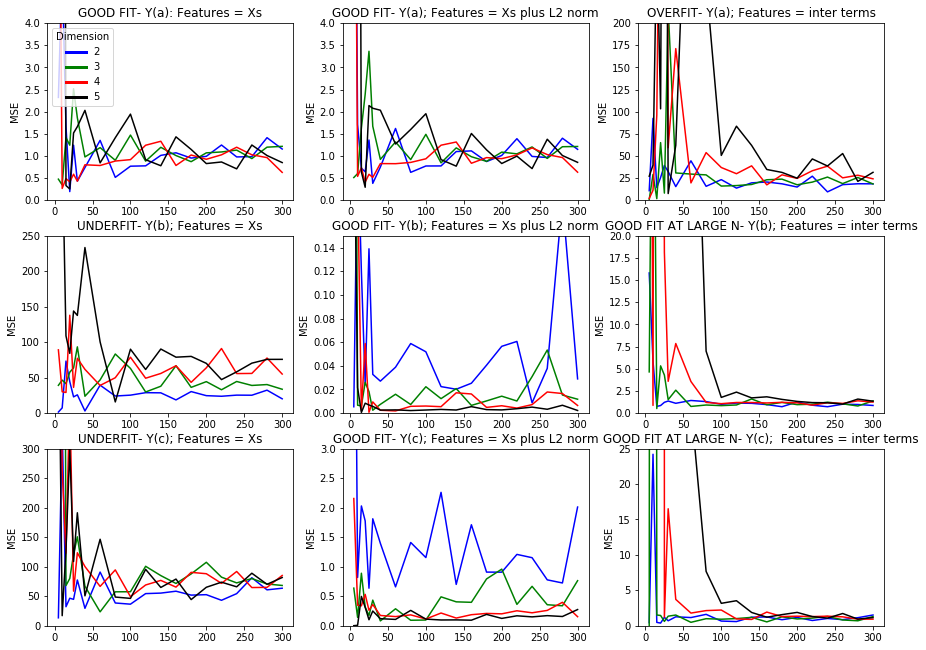

In [40]:
f, axs = plt.subplots(3,3,figsize=(15,15))

plt.subplot(4, 3, 1)
plt.plot(n_range, results_A1.iloc[:,0], 'b-', n_range, results_A1.iloc[:,1], 'g-', n_range, results_A1.iloc[:, 2], 'r-', n_range, results_A1.iloc[:,3], 'k-')
plt.title('GOOD FIT- Y(a): Features = Xs')
plt.ylabel('MSE')
plt.legend(lines, labels, loc = "upper left", title = "Dimension")
plt.ylim(0,4)

plt.subplot(4, 3, 2)
plt.plot(n_range, results_A2.iloc[:,0], 'b-', n_range, results_A2.iloc[:,1], 'g-', n_range, results_A2.iloc[:,2], 'r-', n_range, results_A2.iloc[:,3], 'k-')
plt.title('GOOD FIT- Y(a); Features = Xs plus L2 norm')
plt.ylabel('MSE')
plt.ylim(0,4)

plt.subplot(4, 3, 3)
plt.plot(n_range, results_A3.iloc[:,0], 'b-', n_range, results_A3.iloc[:,1], 'g-', n_range, results_A3.iloc[:,2], 'r-', n_range, results_A3.iloc[:,3], 'k-')
plt.title('OVERFIT- Y(a); Features = inter terms')
plt.ylabel('MSE')
plt.ylim(0,200)

plt.subplot(4, 3, 4)
plt.plot(n_range, results_B1.iloc[:,0], 'b-', n_range, results_B1.iloc[:,1], 'g-', n_range, results_B1.iloc[:,2], 'r-', n_range, results_B1.iloc[:,3], 'k-')
plt.title('UNDERFIT- Y(b); Features = Xs')
plt.ylabel('MSE')
plt.ylim(0,250)

plt.subplot(4, 3, 5)
plt.plot(n_range, results_B2.iloc[:,0], 'b-', n_range, results_B2.iloc[:,1], 'g-', n_range, results_B2.iloc[:,2], 'r-',n_range, results_B2.iloc[:,3], 'k-')
plt.title('GOOD FIT- Y(b); Features = Xs plus L2 norm')
plt.ylabel('MSE')
plt.ylim(0,0.15)

plt.subplot(4, 3, 6)
plt.plot(n_range, results_B3.iloc[:,0], 'b-', n_range, results_B3.iloc[:,1], 'g-', n_range, results_B3.iloc[:,2], 'r-', n_range, results_B3.iloc[:,3], 'k-')
plt.title('GOOD FIT AT LARGE N- Y(b); Features = inter terms')
plt.ylabel('MSE')
plt.ylim(0,20)

plt.subplot(4, 3, 7)
plt.plot(n_range, results_C1.iloc[:,0], 'b-', n_range, results_C1.iloc[:,1], 'g-', n_range, results_C1.iloc[:,2], 'r-', n_range, results_C1.iloc[:,3], 'k-')
plt.title('UNDERFIT- Y(c); Features = Xs')
plt.ylabel('MSE')
plt.ylim(0,300)

plt.subplot(4, 3, 8)
plt.plot(n_range, results_C2.iloc[:,0], 'b-', n_range, results_C2.iloc[:,1], 'g-', n_range, results_C2.iloc[:,2], 'r-', n_range, results_C2.iloc[:,3], 'k-')
plt.title('GOOD FIT- Y(c); Features = Xs plus L2 norm')
plt.ylabel('MSE')
plt.ylim(0,3)

plt.subplot(4, 3, 9)
plt.plot(n_range, results_C3.iloc[:,0], 'b-', n_range, results_C3.iloc[:,1], 'g-', n_range, results_C3.iloc[:,2], 'r-', n_range, results_C3.iloc[:,3], 'k-')
plt.title('GOOD FIT AT LARGE N- Y(c);  Features = inter terms')
plt.ylabel('MSE')
plt.ylim(0,25)


plt.show()

#  Comments

- These graphs are exactly the same as above, just scaled to emphasise the impact of dimension and n.

- Varying dimension
    - For column 1 (features = Xs plus an intercept only), it is not easy to see a difference between the different dimensions of X.
    - For column 2(features = Xs plus an intercept and L1 norm), it is also not easy to see a difference between the different dimensions for the Y-generating process that is a linear combination of Xs.
    - However, for column 2 (features = Xs plus an intercept and L1 norm) and features containing quadratic terms, the MSE appears to be higher the lower the dimension. 
        - I posit that this is because of the greater variability in a L1 norm generated from a 2d vector drawn from a uniform distribution that one drawn from a 5-d vector (relative to its mean.) 
        - Greater variance in the feature as input means that the feature can be unreliable out of sample and lead to higher out of sample MSE (as observed. 
    - For column 3 (features = interaction terms), it appears that the MSE is higher for higher dimensions at low n and this difference becomes less noticeable as n increases.
        - This may be because the overall number of features is higher for data generated in higher dimensions (as it includes every interaction term) and therefore more training samples are required in order to differentiate between which features and important and which features are not important.
        
- Varying n
    - As n increases, MSE generally decreases until it stabilises around a particular level (this will continute to vary given randomness in any given input.)

# Code

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
from patsy import dmatrices
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Define functions

def generate_data(d, n):
    
    XA = []
    XB =[]
    XC = []

    YA = []
    YB = []
    YC = []

    for j in np.arange(0, n):

        Xa = np.random.uniform(-5,5,d)
        Xb = np.random.uniform(-5,5,d)
        Xc = np.random.uniform(-5,5,d)

        XA.append(list(Xa))
        XB.append(list(Xb))
        XC.append(list(Xc))

        YA.append(np.sum(Xa) + np.random.normal(0,1))
        YB.append(0.5* (np.sum(Xb ** 2)) + np.random.normal(0,1))
        Yc = 0
        for i in np.arange(0, len(Xc)-1):
            Yc += (1/(i+1)) * (Xc[i] ** 2)
        YC.append(Yc + np.random.normal(0,1))
              
      
    df_A = pd.concat([pd.DataFrame(XA), pd.DataFrame(YA)], axis = 1)
    df_B = pd.concat([pd.DataFrame(XB), pd.DataFrame(YB)], axis = 1)
    df_C = pd.concat([pd.DataFrame(XC), pd.DataFrame(YC)], axis = 1)

    df_A.columns = create_col_names(df_A)
    df_B.columns = create_col_names(df_B)
    df_C.columns = create_col_names(df_C)
        
    results = [df_A, df_B, df_C]
    
    return(results) 

def create_col_names(df):
    
    col_names = []
    for i in np.arange(1, df.shape[1]):
        col_names.append('X' + str(i))
        
    col_names.append('Y')
    
    return(col_names)

In [3]:
# import sys
# sys.setrecursionlimit(2000)

In [49]:
# Define parameters
# n_range = [5,10,15,20,25,30,40,60,80,100,120,140,160,180,200,220,240,260,280,300]
n_range = [5000]
tr_ratio = 0.8
d_range = [2,5]


# Initialise results dataframes
results_A1 = pd.DataFrame()
results_A2 = pd.DataFrame()
results_A3 = pd.DataFrame()
results_B1 = pd.DataFrame()
results_B2 = pd.DataFrame()
results_B3 = pd.DataFrame()
results_C1 = pd.DataFrame()
results_C2 = pd.DataFrame()
results_C3 = pd.DataFrame()

for s_size in n_range: # Loop over range of ns
    
    for d in d_range: # Loop over range of ds
        
        print("Loop", s_size, d)
        
        # Calculate train cutoff
        train_cutoff = int(s_size * tr_ratio)
        
        # Generate data
        df_A, df_B, df_C = generate_data(d, s_size)

        # GLM W/ LINEAR FEATURES

        # Generate regression formulas
        all_columns = "+".join(df_A.columns[:-1])
        formula = "Y~" + str(all_columns)
        formula_l1norm = str(formula) + '+L1_norm'

        # Prepare dfs
        df_YA, df_XA = dmatrices(formula, data = df_A, return_type='dataframe')
        df_YB, df_XB = dmatrices(formula, data = df_B, return_type='dataframe')
        df_YC, df_XC = dmatrices(formula, data = df_C, return_type='dataframe')

        # Train test split
        tr_YA = df_YA [0: train_cutoff]
        te_YA = df_YA [train_cutoff :]
        tr_YB = df_YB [0: train_cutoff]
        te_YB = df_YB [train_cutoff :]
        tr_YC = df_YC [0: train_cutoff]
        te_YC = df_YC [train_cutoff :]

        tr_XA = df_XA [0: train_cutoff]
        te_XA = df_XA [train_cutoff :]
        tr_XB = df_XB [0: train_cutoff]
        te_XB = df_XB [train_cutoff :]
        tr_XC = df_XC [0: train_cutoff]
        te_XC = df_XC [train_cutoff :]
        
        print("Data prepared for Linear Regression")

        # Set up regression to calculate OOS MSE
        olsmod = sm.OLS(tr_YA, tr_XA)
        olsres = olsmod.fit()
        ypred = olsres.predict(te_XA)
        MSE_a_1 = mean_squared_error(te_YA, ypred)
        
        print("A done")

        olsmod = sm.OLS(tr_YB, tr_XB)
        olsres = olsmod.fit() 
        ypred = olsres.predict(te_XB)
        MSE_b_1 = mean_squared_error(te_YB, ypred)
        
        print("B done")

        olsmod = sm.OLS(tr_YC, tr_XC)
        olsres = olsmod.fit() 
        ypred = olsres.predict(te_XC)
        MSE_c_1 = mean_squared_error(te_YC, ypred)
        
        print("C done")

        # Add OOS MSE to dfs
        results_A1.loc[s_size, d] = MSE_a_1
        results_B1.loc[s_size, d] = MSE_b_1
        results_C1.loc[s_size, d] = MSE_c_1
        
        print("Linear regression complete")

        # GLM W/ LINEAR FEATURES PLUS L2 NORM

        # Create extra feature
        for df in [df_A, df_B, df_C]:
            df['L1_norm'] = np.apply_along_axis(np.linalg.norm, 1, df)

        # Prepare dfs
        df_YA, df_XA = dmatrices(formula_l1norm, data = df_A, return_type='dataframe')
        df_YB, df_XB = dmatrices(formula_l1norm, data = df_B, return_type='dataframe')
        df_YC, df_XC = dmatrices(formula_l1norm, data = df_C, return_type='dataframe')

        # Train test split
        tr_YA = df_YA[0: train_cutoff]
        te_YA = df_YA[train_cutoff :]
        tr_YB = df_YB[0: train_cutoff]
        te_YB = df_YB[train_cutoff :]
        tr_YC = df_YC[0: train_cutoff]
        te_YC = df_YC[train_cutoff :]

        tr_XA = df_XA[0: train_cutoff]
        te_XA = df_XA[train_cutoff :]
        tr_XB = df_XB[0: train_cutoff]
        te_XB = df_XB[train_cutoff :]
        tr_XC = df_XC[0: train_cutoff]
        te_XC = df_XC[train_cutoff :]
        
        print("Data prepared for L1 norm regression")

        # Set up regression to calculate OOS MSE
        olsmod = sm.OLS(tr_YA, tr_XA)
        olsres = olsmod.fit() 
        ypred = olsres.predict(te_XA)
        MSE_a_2 = mean_squared_error(te_YA, ypred)
        
        print("A done")

        olsmod = sm.OLS(tr_YB, tr_XB)
        olsres = olsmod.fit() 
        ypred = olsres.predict(te_XB)
        MSE_b_2 = mean_squared_error(te_YB, ypred)
        
        print("B done")

        olsmod = sm.OLS(tr_YC, tr_XC)
        olsres = olsmod.fit() 
        ypred = olsres.predict(te_XC)
        MSE_c_2 = mean_squared_error(te_YC, ypred)
        
        print("C done")

        # Add OOS MSE to df
        results_A2.loc[s_size, d] = MSE_a_2
        results_B2.loc[s_size, d] = MSE_b_2
        results_C2.loc[s_size, d] = MSE_c_2
        
        # Drop L1 norm variable for interaction term regression
        df_A = df_A.drop('L1_norm', axis= 1)
        df_B = df_B.drop('L1_norm', axis= 1)
        df_C = df_C.drop('L1_norm', axis= 1)
        
        print("L1 norm regression complete")

        # GLM W/ INTERACTION TERMS AS FEATURES

        len_A = len(df_A.columns) -1

        for df in [df_A, df_B, df_C]:

            for i in df.columns[:-1]:
                for j in df.columns[:-1]:
                    if i >= j:
                        column_name = str(i) + str(j)
                        df[column_name] = df.loc[:, i] * df.loc[:, j]


        df_A = df_A.drop(df_A.columns[0:len_A], axis=1)
        df_B = df_B.drop(df_B.columns[0:len_A], axis=1)
        df_C = df_C.drop(df_C.columns[0:len_A], axis=1)

        # Generate formula
        all_columns = "+".join(df_A.columns[1:])
        formula_inters = "Y~" + str(all_columns)

        # Prepare dfs
        df_YA, df_XA = dmatrices(formula_inters, data = df_A, return_type='dataframe')
        df_YB, df_XB = dmatrices(formula_inters, data = df_B, return_type='dataframe')
        df_YC, df_XC = dmatrices(formula_inters, data = df_C, return_type='dataframe')

        # Train test split
        tr_YA = df_YA [0: train_cutoff]
        te_YA = df_YA [train_cutoff :]
        tr_YB = df_YB [0: train_cutoff]
        te_YB = df_YB [train_cutoff :]
        tr_YC = df_YC [0: train_cutoff]
        te_YC = df_YC [train_cutoff :]

        tr_XA = df_XA [0: train_cutoff]
        te_XA = df_XA [train_cutoff :]
        tr_XB = df_XB [0: train_cutoff]
        te_XB = df_XB [train_cutoff :]
        tr_XC = df_XC [0: train_cutoff]
        te_XC = df_XC [train_cutoff :]
        
        print("Data prepared for interaction term regression")

        # Set up regression to calculate OOS MSE
        olsmod = sm.OLS(tr_YA, tr_XA)
        olsres = olsmod.fit() 
        ypred = olsres.predict(te_XA)
        MSE_a_3 = mean_squared_error(te_YA, ypred)
        
        print("A done")

        olsmod = sm.OLS(tr_YB, tr_XB)
        olsres = olsmod.fit() 
        ypred = olsres.predict(te_XB)
        MSE_b_3 = mean_squared_error(te_YB, ypred)
        
        print("B done")

        olsmod = sm.OLS(tr_YC, tr_XC)
        olsres = olsmod.fit() 
        ypred = olsres.predict(te_XC)
        MSE_c_3 = mean_squared_error(te_YC, ypred)
        
        print("C done")

        # Add OOS MSE to df
        results_A3.loc[s_size, d] = MSE_a_3
        results_B3.loc[s_size, d] = MSE_b_3
        results_C3.loc[s_size, d] = MSE_c_3
        
        print("Interaction term regression complete")

Loop 5000 2
Data prepared for Linear Regression
A done
B done
C done
Linear regression complete
Data prepared for L1 norm regression
A done
B done
C done
L1 norm regression complete
Data prepared for interaction term regression
A done
B done
C done
Interaction term regression complete
Loop 5000 5
Data prepared for Linear Regression
A done
B done
C done
Linear regression complete
Data prepared for L1 norm regression
A done
B done
C done
L1 norm regression complete
Data prepared for interaction term regression
A done
B done
C done
Interaction term regression complete
